# Programming and Visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import math
from imageio import imread

## 0.6: Scatter and Line Plots

### 0.6 a) load data from file

In [ ]:
expdat = np.genfromtxt(fname='data/expDat.txt', delimiter=',', 
                       dtype=int, skip_header=1)[:,1:]
np.set_printoptions(edgeitems=5)
print(expdat)

[[1 0 0 2 2 ... 1 1 4 2 1]
 [2 2 2 2 0 ... 3 2 1 1 2]
 [3 2 3 2 3 ... 2 2 1 1 3]
 [0 4 1 2 3 ... 2 0 0 1 2]
 [6 2 1 2 0 ... 5 2 0 3 3]
 ...
 [5 4 1 2 3 ... 4 1 3 2 4]
 [4 2 4 2 1 ... 1 1 2 0 3]
 [1 3 2 0 1 ... 3 3 3 2 1]
 [2 1 3 2 3 ... 1 1 2 2 5]
 [2 2 3 1 2 ... 0 4 0 3 1]]


In [10]:
print(expdat.shape)

(100, 20)


### 0.6 b) create line plot

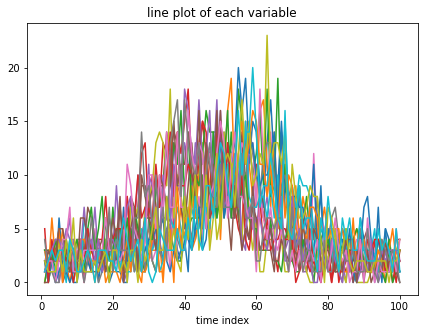

In [6]:
time = np.arange(1, expdat.shape[0]+1) # creates a range [1,2,3,...,no. of variable]
plt.figure(figsize=(7,5))
for j in range(expdat.shape[1]):
    plt.plot(time, expdat[:, j])
plt.title('line plot of each variable')
plt.xlabel('time index')
plt.show()

### 0.6 b) scatter plot grid

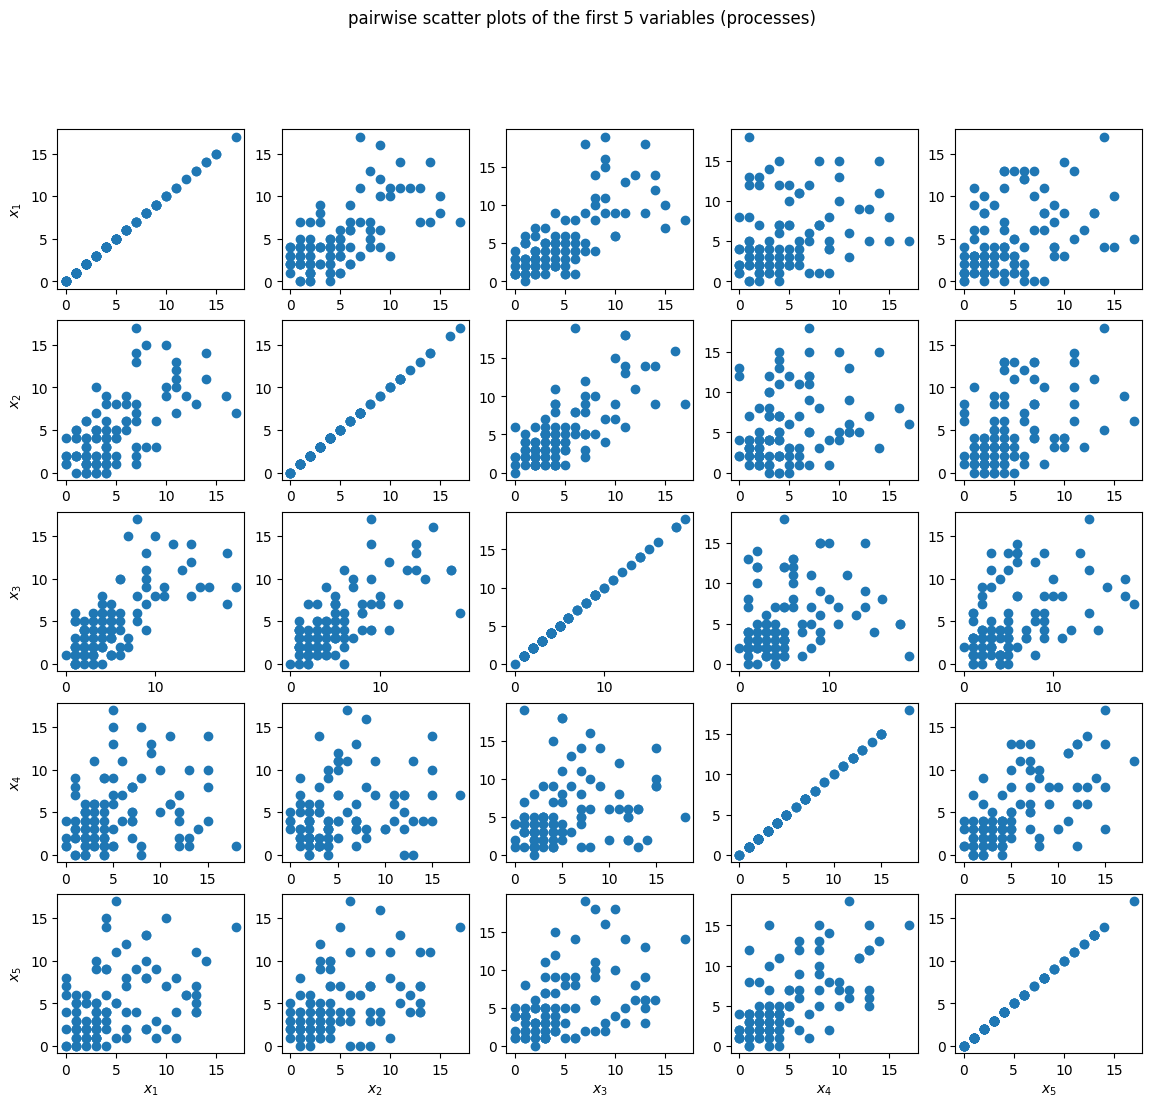

In [11]:
N = 5
plt.figure(figsize=(14,12))
for i in range(N):
    for j in range(N):
        plt.subplot(N, N, i*N+j+1)
        plt.scatter(expdat[:,i], expdat[:,j])    
        if j==0:
            plt.ylabel('$x_{}$'.format(i+1))
        if i==N-1:
            plt.xlabel('$x_{}$'.format(j+1))
plt.suptitle('pairwise scatter plots of the first {} variables (processes)'.format(N))
plt.show()

### 0.6 c) covariance matrix

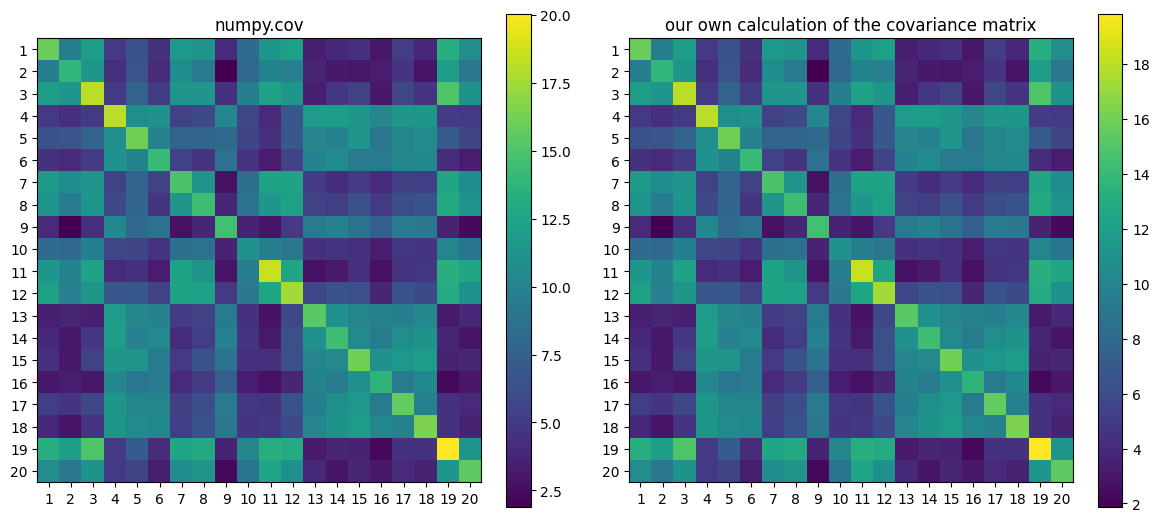

In [24]:
# We can use an off-the-shelf routine for calculating the covariance matrix for our data.
# Watch out for how to use this function!
# Check the documentation to determine if the functions assumes each row to be a variable or an observation.
expdat_cov_numpy = np.cov(expdat, rowvar=False)
# Verify we've used the function correctly by inspecting the shape of the covariance matrix
assert(np.all(expdat_cov_numpy.shape == (20, 20)))

# OR we compute the covariance matrix of the centered data ourselves
# Watch out whether we're computing the mean over rows or columns
μ = np.mean(expdat, axis=0)
X = (expdat - μ)
expdat_cov_custom = 1.0/expdat.shape[0] * np.dot(X.T, X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,12))

im = ax1.imshow(expdat_cov_numpy, interpolation='none')
ax1.set_title('numpy.cov')
# Add a colorbar to the subplot
# The fraction argument was adjusted until the colorbar had the appropriate size
plt.colorbar(im, ax=ax1, fraction=0.05);
# adjust axis labels to show variable index (e.g. 1 for x1, 2 for x2,...)
ax1.set_xticks(np.arange(len(expdat_cov_numpy)))
ax1.set_xticklabels(np.arange(len(expdat_cov_numpy))+1)
ax1.set_yticks(np.arange(len(expdat_cov_numpy)))
ax1.set_yticklabels(np.arange(len(expdat_cov_numpy))+1)

im = ax2.imshow(expdat_cov_custom, interpolation='none')
ax2.set_title('our own calculation of the covariance matrix')
# Add a colorbar to the subplot
# The fraction argument was adjusted until the colorbar had the appropriate size
plt.colorbar(im, ax=ax2, fraction=0.05);
# adjust axis labels to show variable index (e.g. 1 for x1, 2 for x2,...)
ax2.set_xticks(np.arange(len(expdat_cov_custom)))
ax2.set_xticklabels(np.arange(len(expdat_cov_custom))+1)
ax2.set_yticks(np.arange(len(expdat_cov_custom)))
ax2.set_yticklabels(np.arange(len(expdat_cov_custom))+1)
# plt.colorbar(fraction=0.04)
plt.show() # gets rid of matplotlib printing

## 0.7: Plotting 3d

### 0.7 a) load data from file pca-data-3d.txt

In [ ]:
pca3d = np.genfromtxt(fname = 'data/pca-data-3d.txt', delimiter=',', 
                       dtype = float, skip_header=1)
print(pca3d)

[[-0.19426329  0.2235241  -0.21112988]
 [ 0.02034613 -0.38014867 -0.99047169]
 [ 0.83225938  3.05490094 -2.72578164]
 [ 0.77687285  1.54046457  1.26972067]
 [-0.02552735  0.06469636  0.08862424]
 ...
 [-1.10285394  0.17244701 -2.98712628]
 [ 0.49079532 -0.98594303 -0.77120806]
 [-1.43283404 -3.48706989  1.83608382]
 [ 0.79887207  1.11430493  2.21229285]
 [ 0.90391051  1.51089626  0.81628342]]


### 0.7 b) scatter plot matrix for each column pair

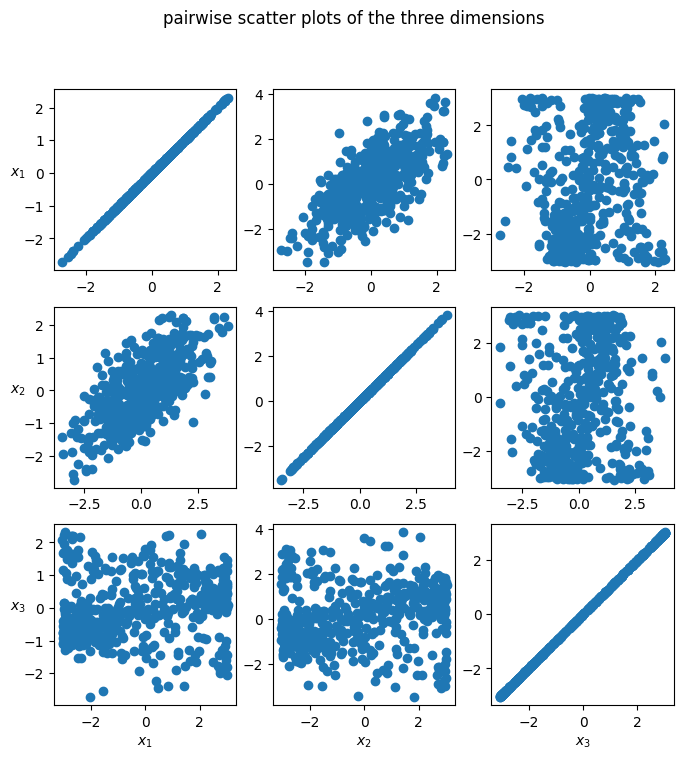

In [27]:
plt.figure(figsize=(8,8))
plt.suptitle('pairwise scatter plots of the three dimensions')
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        plt.subplot(3, 3, i*3+j+1)
        plt.scatter(pca3d[:,i], pca3d[:,j])        
        if j==0:
            # Have y-axis label text appear horizontal
            plt.ylabel('$x_{}$'.format(i+1), rotation=0)
        if i==2:
            plt.xlabel('$x_{}$'.format(j+1))

### 0.7 c) visualize data in  3d (scatter plot)

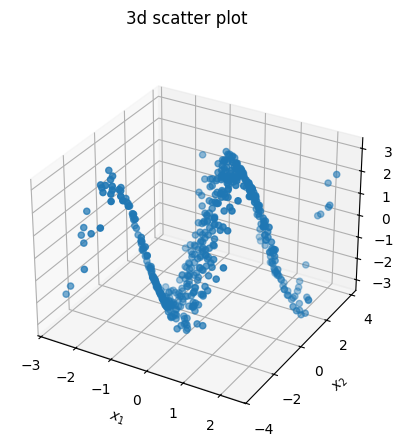

In [28]:
fig = plt.figure()
plt.suptitle('3d scatter plot')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3d[:, 0], pca3d[:, 1], pca3d[:, 2], zdir='z')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

# 0.7 d) scatter plot of first two dimensions

Text(0.5, 1.0, 'scatter plot of only first two dimensions')

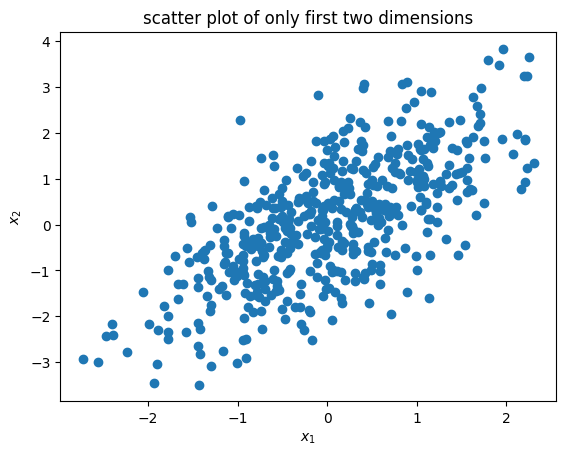

In [29]:
plt.scatter(pca3d[:, 0], pca3d[:, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('scatter plot of only first two dimensions')

### 0.7 d) project 2d data onto unit vectors
$$\underline{\mathbf{e}}_a = \begin{pmatrix} \cos(\theta) \\ \sin(\theta) \end{pmatrix}$$

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xk/w_81rrgj41520qq57zhdws6r0000gn/T/ipykernel_97423/2995166268.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathrm{Var}(u_a)$')


Text(0.5, 1.0, 'variance of projected data vs. angle of unit vector')

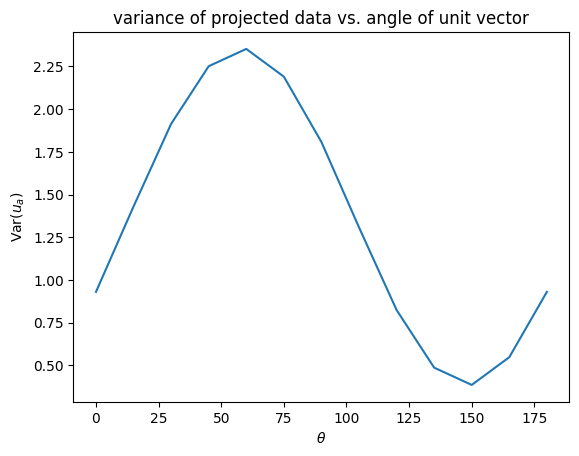

In [32]:
angles = np.arange(0, 180+1, 15)
variances = np.zeros_like(angles, dtype=float)
for i in range(len(angles)):
    theta = angles[i] * 2*math.pi/360.
    e_a = np.array([math.cos(theta), math.sin(theta)])
    u_a = np.dot(pca3d[:, 0:2], e_a)
    variances[i] = np.var(u_a)
plt.plot(angles, variances)
plt.xlabel('$\\theta$')
plt.ylabel('$\mathrm{Var}(u_a)$')
plt.title('variance of projected data vs. angle of unit vector')
    

# 0.8: Image data

### 0.8 a) load data from file natIMG.jpg

In [ ]:
natimg = imread('data/natIMG.jpg')
print(natimg.shape)
print(natimg)

(256, 512)
[[159 147 149 140 140 ... 158 162 149 143 122]
 [157 143 143 155 146 ... 150 135 123 142 139]
 [140 144 158 168 159 ... 131 123 110 123 126]
 [149 150 152 158 151 ... 119 119 111 108 105]
 [191 155 147 144 143 ... 102  94 105 107  96]
 ...
 [119 185 181 153 126 ...  83  78  93 106 146]
 [186 155 153 171 168 ...  92 103  99 111 139]
 [ 99  70  76 135 148 ...  86 114 100 102 132]
 [ 71  62  74 119 149 ...  83  98 104 107 140]
 [128 132 142 153 119 ... 108 106 105 108 147]]


/var/folders/xk/w_81rrgj41520qq57zhdws6r0000gn/T/ipykernel_97423/1441672723.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  natimg = imread('natIMG.jpg')


### 0.8 b) heatmap plot using a grayscale colormap

Text(0.5, 1.0, 'image pixel matrix')

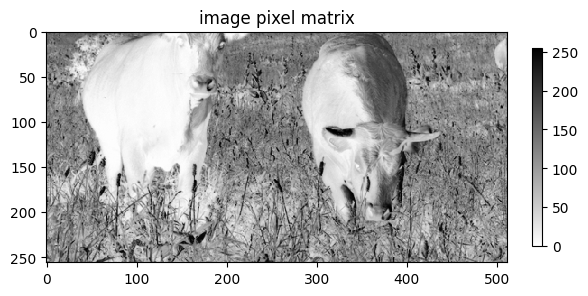

In [34]:
plt.figure()
plt.imshow(natimg, cmap='gray_r', interpolation='none')
plt.colorbar(fraction=0.02)
plt.title('image pixel matrix')

### plot 100 sample patches (10x10 pixels)

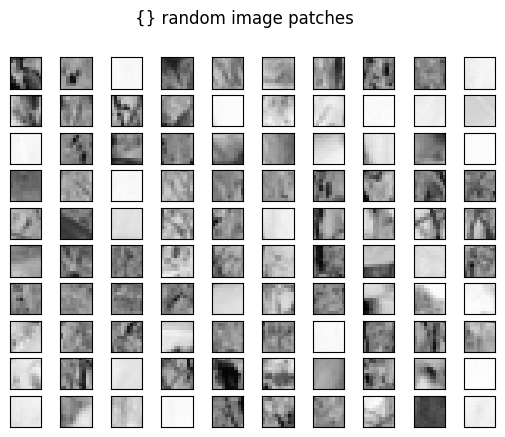

In [35]:
plt.figure()
N = 100
plt.suptitle('{} random image patches')
plot_rowcols = math.ceil(np.sqrt(N))
patchsize = 10
max_px = natimg.max()
min_px = natimg.min()
dimy, dimx = natimg.shape
for i in range(N):
    plt.subplot(plot_rowcols, plot_rowcols, i+1)
    rand_x = np.random.randint(dimx - patchsize)
    rand_y = np.random.randint(dimy - patchsize)
    rand_patch = natimg[rand_y:rand_y+patchsize, 
                        rand_x:rand_x+patchsize]
    plt.imshow(rand_patch, cmap='gray_r', interpolation='none', 
               vmin=min_px, vmax=max_px)
    # for cleaner output:
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

# 0.8: The Gaussian function

## 1-d case

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xk/w_81rrgj41520qq57zhdws6r0000gn/T/ipykernel_97423/3449827092.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.title('The Gaussian function ($\mu=%.1f,\sigma=%.1f$)' % (mu,sigma), fontsize=17)


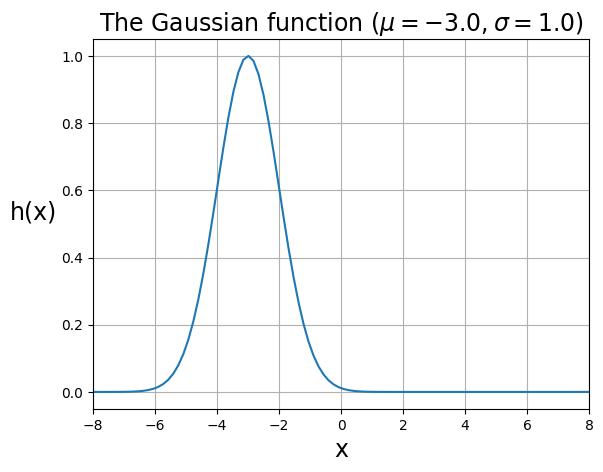

In [37]:
x = np.linspace(-8,8,100,endpoint=True)
sigma = 1
mu = -3
func_gauss = lambda v: np.exp(-v**2/(2*sigma**2))
y = [func_gauss(a) for a in x-mu]
plt.plot(x,y)
plt.grid()
plt.xlabel('x', fontsize=17)
plt.ylabel('h(x)', fontsize=17, rotation='horizontal', labelpad=20)
plt.xlim([-8,8])
plt.title('The Gaussian function ($\mu=%.1f,\sigma=%.1f$)' % (mu,sigma), fontsize=17)
plt.show()

## 2-d case

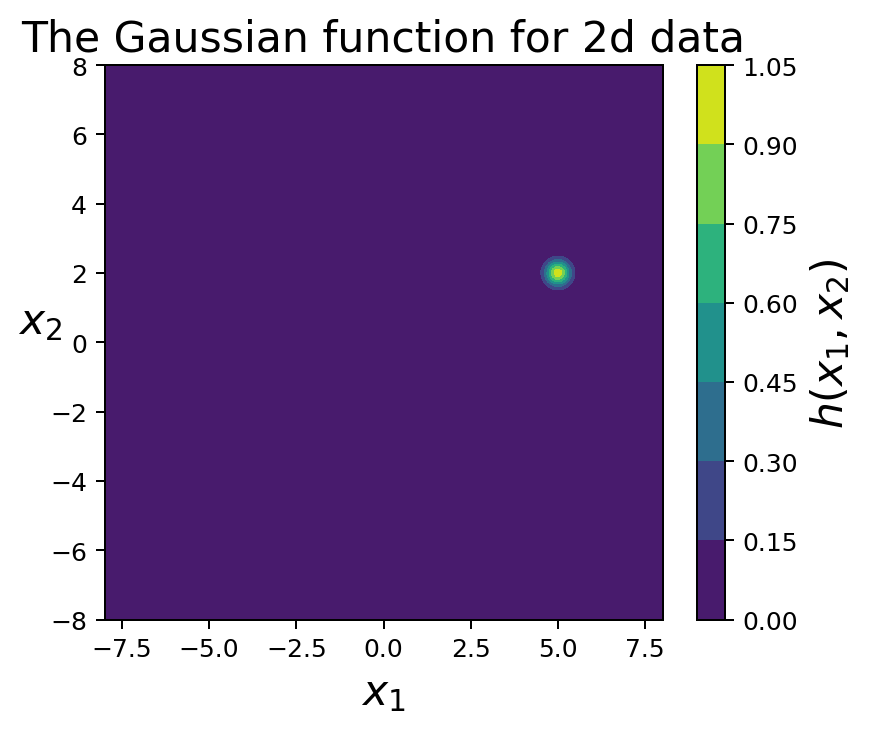

In [38]:
x1 = x2 = np.linspace(-8, 8, 200, endpoint=True)
mu = [5,2]
sigma = 0.25
xx1, xx2 = np.meshgrid(x1-mu[0], x2-mu[1])
h = np.exp(-(xx1**2+xx2**2)/(2*sigma**2))

plt.figure(figsize=(5,4), dpi=180)
h = plt.contourf(x1, x2, h)
ax_cbar = plt.colorbar()
plt.xlabel('$x_1$', fontsize=17)
plt.ylabel('$x_2$', fontsize=17, rotation='horizontal')
plt.xlim([-8,8])
plt.ylim([-8,8])
ax_cbar.set_label('$h(x_1,x_2)$', fontsize=17)
plt.title('The Gaussian function for 2d data', fontsize=17)
plt.show()
